# EDA and Data Cleaning

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Data from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
# Import raw data
raw_data = pd.read_csv('../data/heart.csv')
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Check for NaN values in columns

In [3]:
nan_count = raw_data.isna().sum()
print(nan_count)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


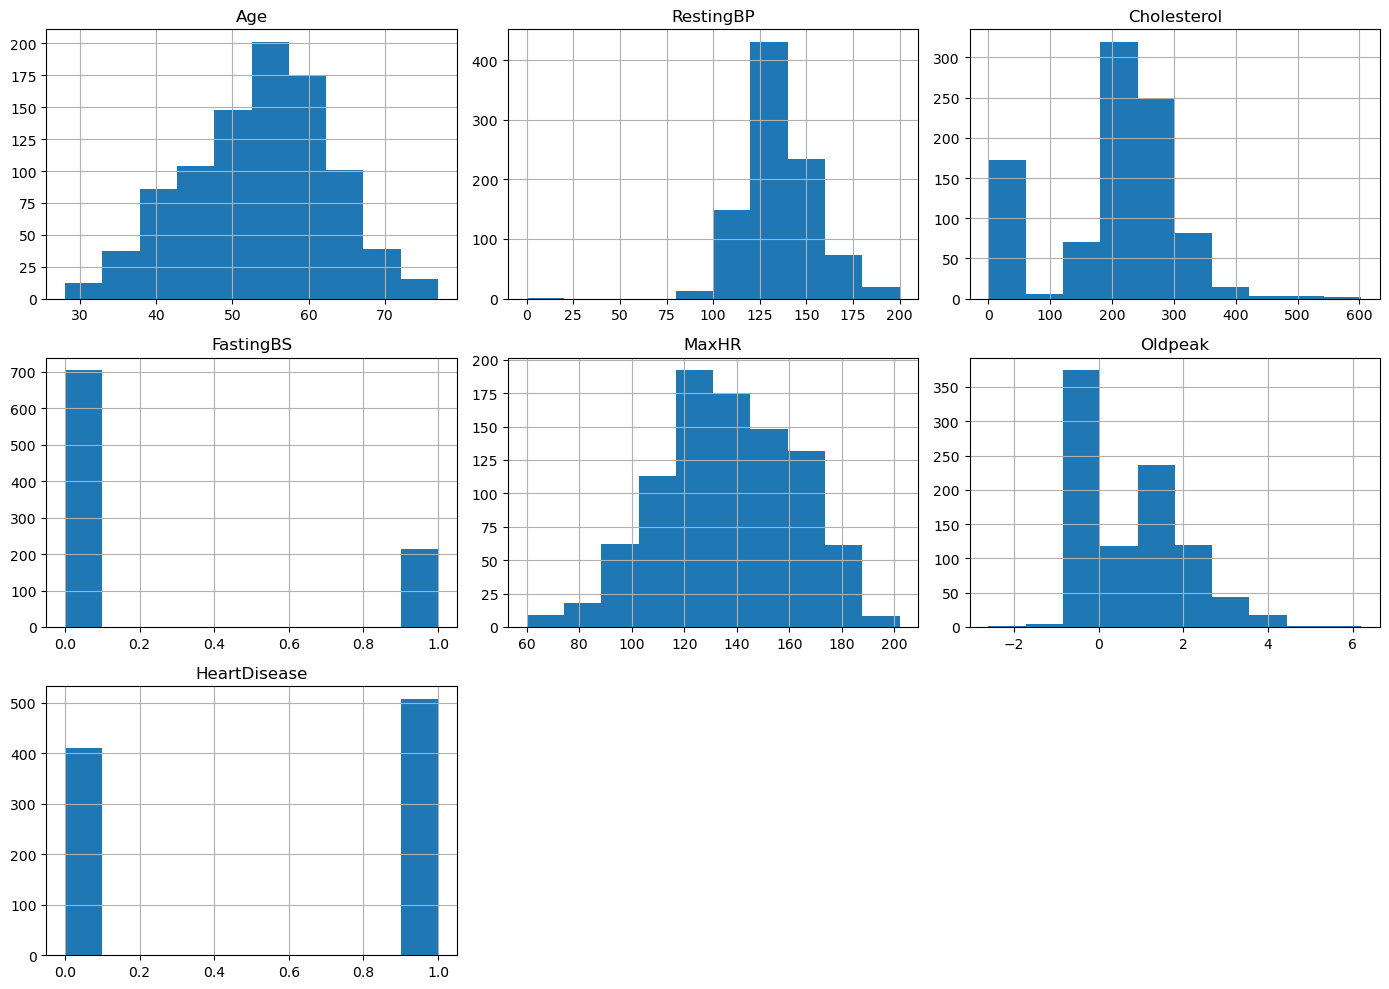

In [4]:
raw_data.hist(figsize=(14, 10))
plt.tight_layout()
plt.savefig('../figures/eda_histograms.png')

### Looking at class distributions

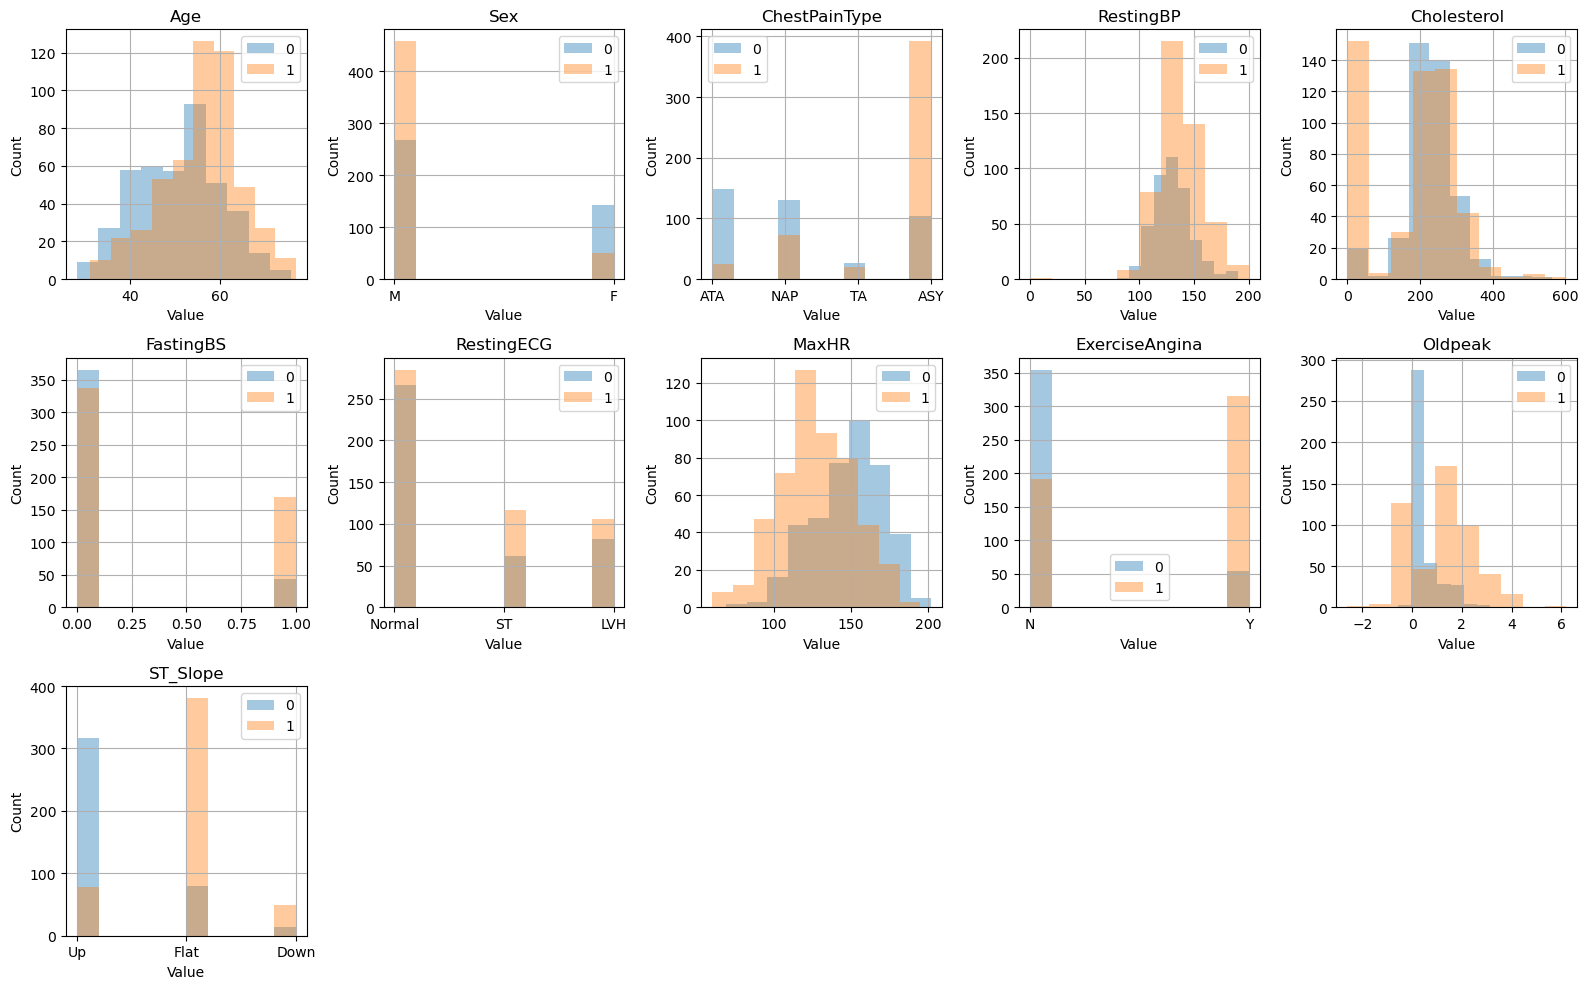

In [5]:
fig,axes = plt.subplots(nrows=3,ncols=5,figsize=(16,10))

# loop through each column in the dataframe
for i, col in enumerate(raw_data.columns[:-1]):
    # select the appropriate subplot axis based on the index i
    ax = axes[i // 5, i % 5]
    # plot a histogram of the column for each group in 'HeartDisease'
    raw_data.groupby('HeartDisease')[col].hist(alpha=0.4, ax=ax)
    # set the title, y-axis label, and x-axis label for the subplot
    ax.set_title(col)
    ax.set_ylabel("Count")
    ax.set_xlabel("Value")
    ax.legend(raw_data['HeartDisease'])

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])
fig.delaxes(axes[2][4])
# adjust the spacing between the subplots for better readability
plt.tight_layout()
plt.savefig('../figures/eda_class_distributions.png')

### PCA

In [22]:
categorical_columns= ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope' ]
X = raw_data.drop(columns=categorical_columns)
y = raw_data['HeartDisease']

In [25]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [28]:
# Using PCA
pca = PCA(n_components = 7)
pca.fit(X_standardized)

PCA(n_components=7)

In [30]:
p_c = pca.fit_transform(X_standardized)
# print(principalComponents)

principal_df = pd.DataFrame(data=p_c, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

final_df = pd.concat([principal_df, y],axis=1)
final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,HeartDisease
0,-2.417053,-0.508044,-0.536672,0.492483,-0.592140,0.263087,0.035454,0
1,0.138073,-0.813523,-0.245526,0.495047,-1.577625,-0.012082,0.836385,1
2,-1.346575,0.120716,0.050249,-1.194085,-0.405928,1.707199,-1.379748,0
3,0.768445,-0.416296,0.876559,-0.468257,-0.780828,0.872467,-0.231420,1
4,-0.519631,-0.324544,-1.160150,-1.158588,-0.430199,0.032315,-0.483574,0


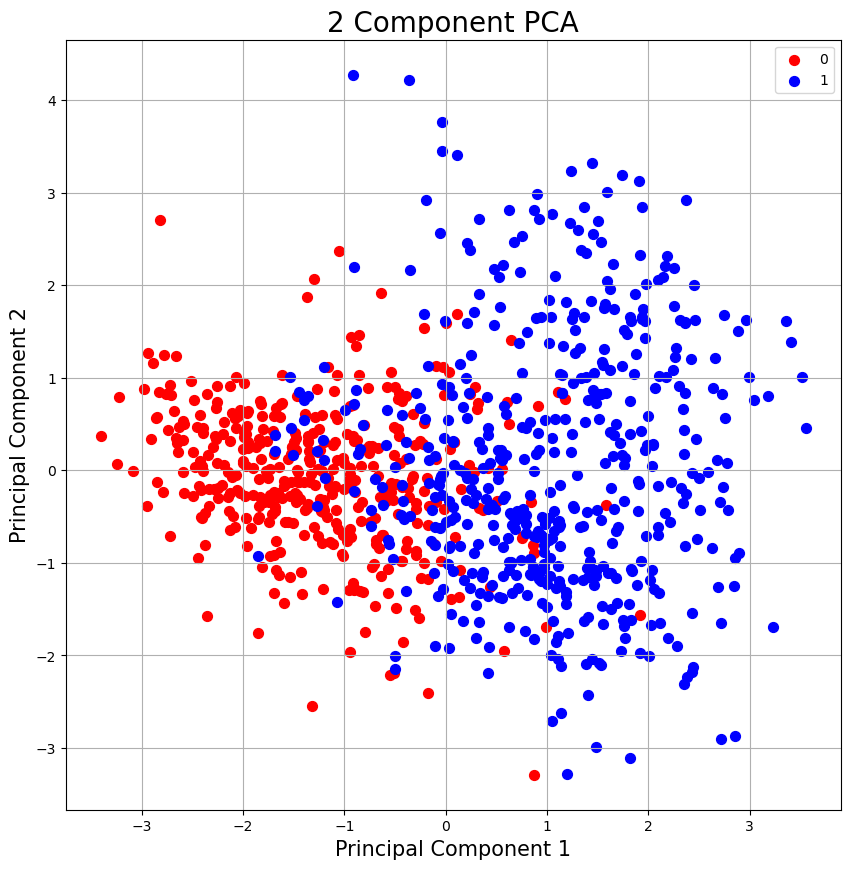

In [32]:
# Plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['HeartDisease'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('../figures/2_component_pca.png')

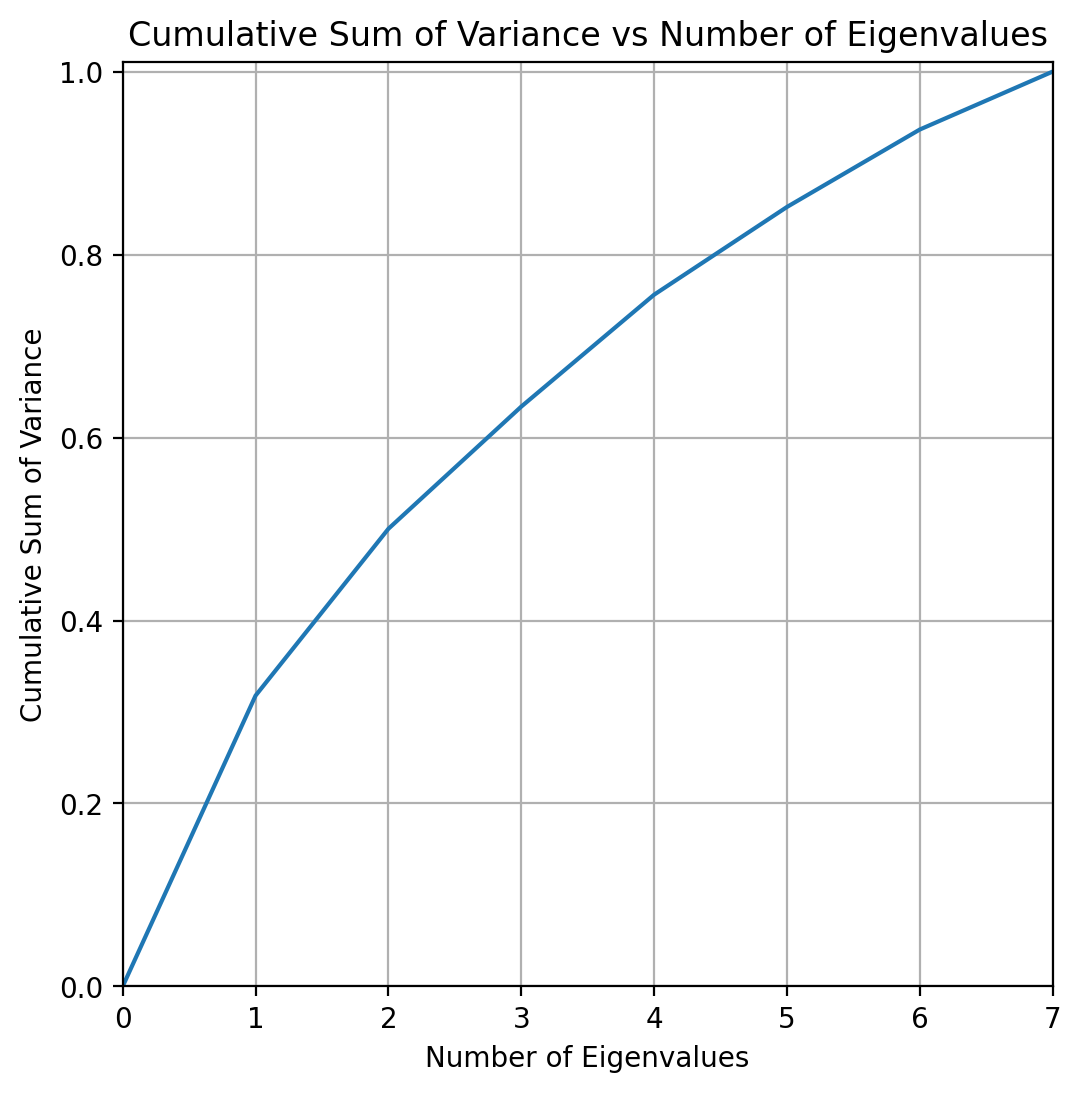

In [35]:
## Variability of components
# Consider the first 4 components. How much variability of the model do these components take into account?
cum_var = pca.explained_variance_ratio_.cumsum()
cum_var=np.insert(cum_var,0,0)
k_features = list(range(0,X.shape[1]+1))

# Plot figure
fig = plt.figure(figsize=(6, 6), dpi=200)
ax = fig.add_subplot(1,1,1)
ax.plot(k_features,cum_var)
# plt.rc('axes', titlesize=14)
# plt.rc('axes', labelsize=12)
ax.set_xlabel("Number of Eigenvalues")
ax.set_ylabel("Cumulative Sum of Variance")
ax.set_title("Cumulative Sum of Variance vs Number of Eigenvalues")
ax.set_xlim([0,7])
ax.set_ylim([0,1.01])
ax.grid()
plt.savefig('../figures/sum_of_variance.png')